In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path="/content/drive/MyDrive/Dataset/API_SP.POP.TOTL_DS2_en_csv_v2_351316.csv"
df = pd.read_csv(path)  # Skip the first 4 rows that typically contain metadata

# Display the first few rows to understand the structure
print(df.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

                Country Name.1  ...         1985         1986         1987  \
0             

Enter the year to visualize population data (or type 'exit' to quit): 1960


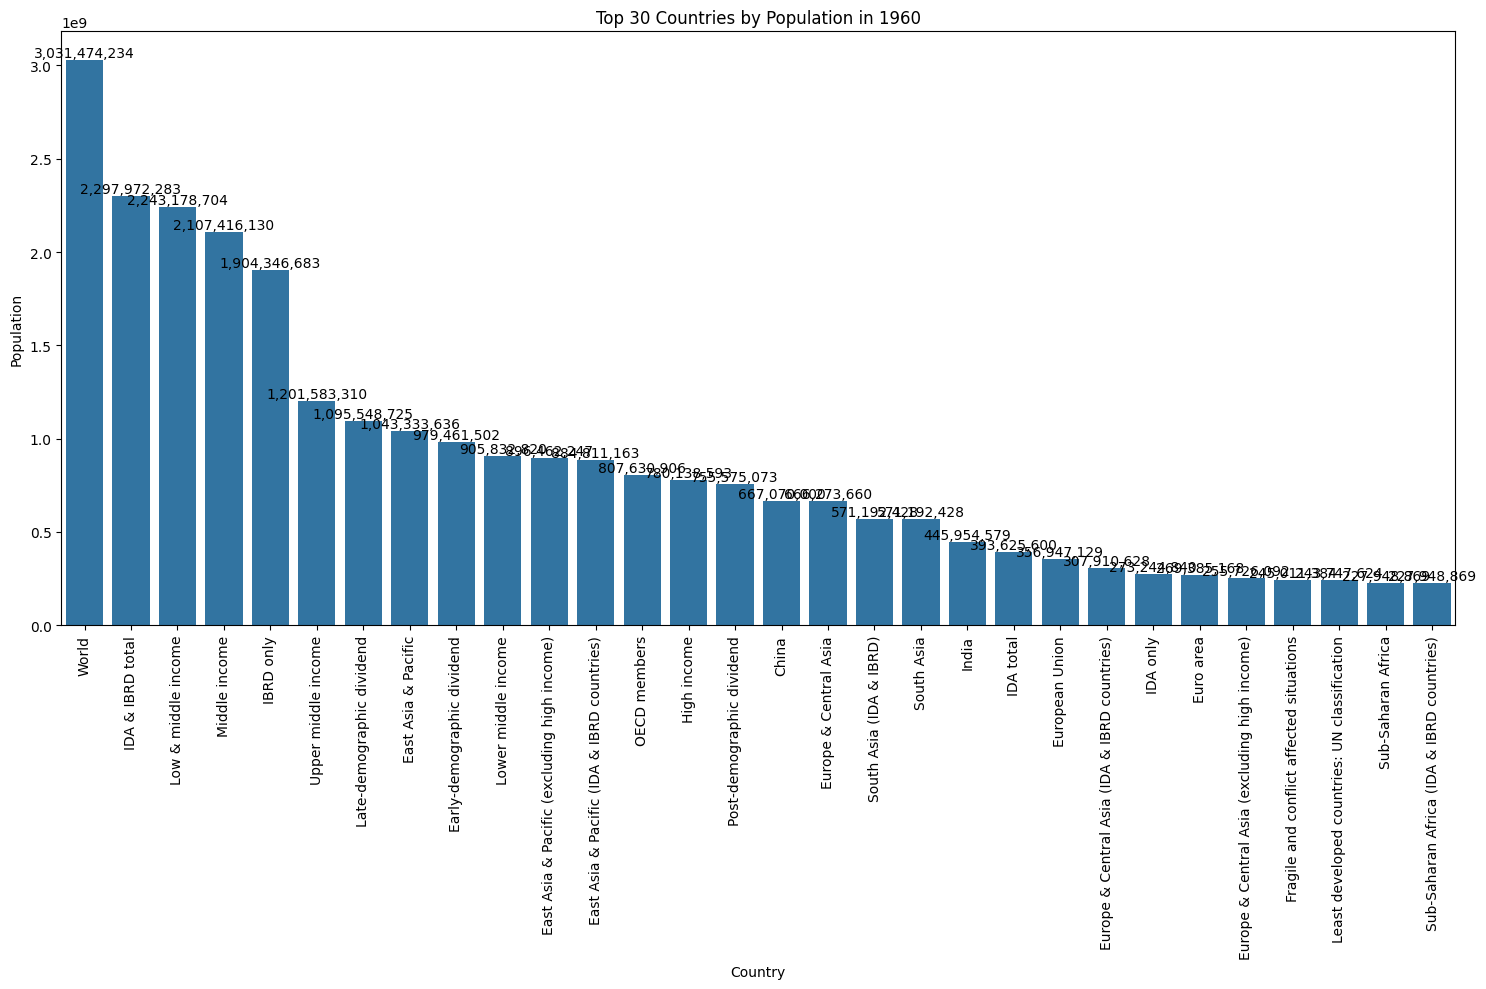

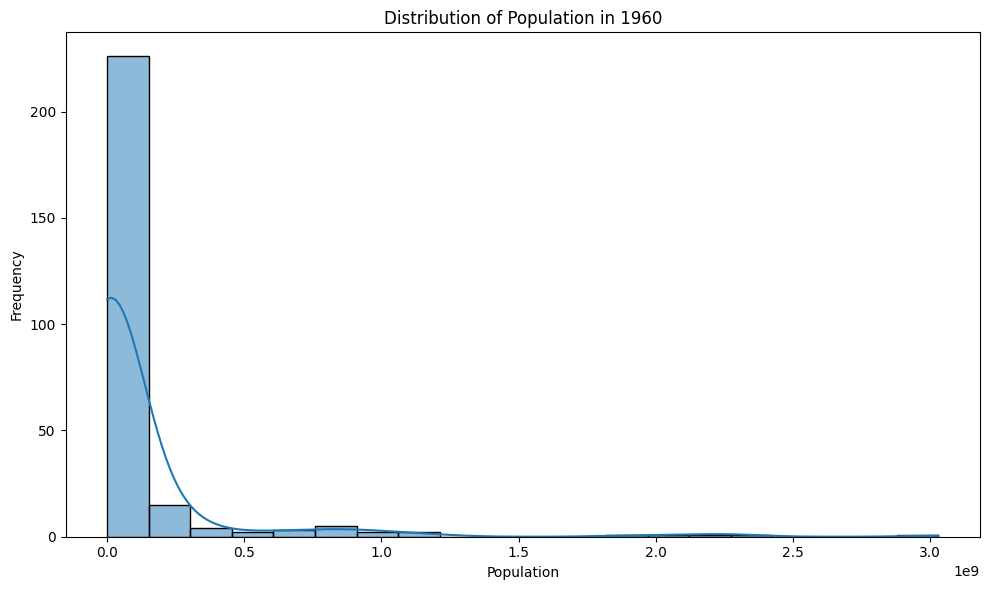

Enter the year to visualize population data (or type 'exit' to quit): exit


In [8]:
def plot_population_distribution(year):
    # Check if the specified year is in the columns
    year_col = None
    for col in df.columns:
        if year in col:
            year_col = col
            break

    if year_col:
        # Select the data for the specific year
        df_year = df[['Country Name', year_col]].dropna()  # Drop rows with missing population data for the year

        # Convert the population data to numeric (it might be read as a string)
        df_year[year_col] = pd.to_numeric(df_year[year_col], errors='coerce')

        # Sort the data by population
        df_year = df_year.sort_values(by=year_col, ascending=False).reset_index(drop=True)

        # Plotting Bar Chart
        plt.figure(figsize=(15, 10))
        bar_plot = sns.barplot(x='Country Name', y=year_col, data=df_year.head(30))  # Plot top 30 countries by population
        plt.xticks(rotation=90)
        plt.title(f'Top 30 Countries by Population in {year}')
        plt.xlabel('Country')
        plt.ylabel('Population')

        # Annotate the bars with the population values
        for index, row in df_year.head(30).iterrows():
            bar_plot.text(index, row[year_col], f'{int(row[year_col]):,}', color='black', ha="center", va="bottom")

        # Show the bar chart
        plt.tight_layout()
        plt.show()

        # Plotting Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df_year[year_col], bins=20, kde=True)
        plt.title(f'Distribution of Population in {year}')
        plt.xlabel('Population')
        plt.ylabel('Frequency')

        # Show the histogram
        plt.tight_layout()
        plt.show()
    else:
        print(f"The year {year} is not found in the columns of the DataFrame.")

while True:
    year = input("Enter the year to visualize population data (or type 'exit' to quit): ")
    if year.lower() == 'exit':
        break
    plot_population_distribution(year)

                   Country Name         1960
0                         Aruba      54608.0
1   Africa Eastern and Southern  130692579.0
2                   Afghanistan    8622466.0
3    Africa Western and Central   97256290.0
4                        Angola    5357195.0
5                       Albania    1608800.0
6                       Andorra       9443.0
7                    Arab World   93359407.0
8          United Arab Emirates     133426.0
9                     Argentina   20349744.0
10                      Armenia    1904148.0
11               American Samoa      20085.0
12          Antigua and Barbuda      55342.0
13                    Australia   10276477.0
14                      Austria    7047539.0
15                   Azerbaijan    3894500.0
16                      Burundi    2746628.0
17                      Belgium    9153489.0
18                        Benin    2512284.0
19                 Burkina Faso    4783259.0
20                   Bangladesh   50396429.0
21        